In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import tree
import os

In [2]:
# Read the csv file into a pandas DataFrame

Property = pd.read_csv('Resources/Property.csv')
Property.head()

C:\Users\coset\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Parcel_ID,Parcel_Acreage,Property_Street_Address,Property_City,Property_State,Property_Zip,Parcel_Vacancy,Conveyance_Date,Property_Sales_Price,Seller_City,...,Buyer_ZIP,Primary_Residence,Assessed_Value_Land,Assessed_Value_Improvement,Total_Assessed_Value,Property_Class_Code,Class_Code_General,Class_Code_Translated,County_ID,County_Name
0,4574368,0.169,3909 MARIAH DRIVE ...,NEW ALBANY,IN,41750,N,6/2/2020,179900.0,NEW ALBANY,...,47150,Y,43800.0,138500.0,182300.0,510.0,500,Residential,22,Floyd
1,4515880,0.134,4110 E 10TH STREET,INDIAAPOLIS,IN,42601,N,10/19/2020,48000.0,Petaluma,...,46074,N,5000.0,88500.0,93500.0,510.0,500,Residential,49,Marion
2,4454504,0.172,5404 OAK HARBOR CT,INDIANAPOLIS,IN,42637,N,6/18/2020,195000.0,Indianapolis,...,46237,Y,30000.0,158000.0,188000.0,520.0,500,Residential,49,Marion
3,4421719,NaN,6516 EMERALD HILL COURT #310,INDIANAPOLIS,IN,42637,N,5/1/2020,120000.0,Franklin,...,42637,Y,10400.0,77900.0,88300.0,550.0,500,Residential,49,Marion
4,4531964,2.155,6335 Intech Commons Drive,Indianapolis,IN,42678,N,12/16/2020,1785000.0,MIAMI BEACH,...,75093,N,845000.0,957900.0,1802900.0,425.0,400,Commercial,49,Marion


In [3]:
len(Property)

184189

In [4]:
#Drop NA's from DF
pd.DataFrame(Property).dropna()
Property.head()
Property_df = Property[~Property.isin([np.nan, np.inf, -np.inf]).any(1)]
len(Property_df)

180360

In [5]:
#Select 5 Columns of DF
#Property_df=Property_df[['Property_Sales_Price','Total_Assessed_Value','Parcel_Acreage','Parcel_Vacancy','Class_Code_Translated']]
Property_df=Property_df[['Property_Sales_Price','Class_Code_Translated','Total_Assessed_Value','Parcel_Acreage','Parcel_Vacancy', 'County_Name']]

In [6]:
num_col=['Property_Sales_Price','Total_Assessed_Value', 'Parcel_Acreage']

In [7]:

# outliers
print(Property_df[(np.abs(stats.zscore(Property_df[num_col])) > 3)].shape)
# good data
print(Property_df[(np.abs(stats.zscore(Property_df[num_col])) < 3).all(axis=1)].shape)

(646, 6)
(179715, 6)


In [8]:
#Git Rid of Outliers
Property_df = Property_df[(np.abs(stats.zscore(Property_df[num_col])) < 3).all(axis=1)].reset_index()
Property_df.head()

,index,Property_Sales_Price,Class_Code_Translated,Total_Assessed_Value,Parcel_Acreage,Parcel_Vacancy,County_Name
0,0,179900.0,Residential,182300.0,0.169,N,Floyd
1,1,48000.0,Residential,93500.0,0.134,N,Marion
2,2,195000.0,Residential,188000.0,0.172,N,Marion
3,4,1785000.0,Commercial,1802900.0,2.155,N,Marion
4,5,257575.0,Residential,210900.0,0.201,N,Marion


In [9]:
#One Hot encoding for non Numerical 
Property_df=pd.get_dummies(data=Property_df, columns=['Parcel_Vacancy','Class_Code_Translated','County_Name'])
#new_df.head()


In [10]:
#Git Rid of Index
Property_df.drop(['index'],axis=1,inplace=True)



In [11]:
#Seperate X and Y
y = Property_df['Property_Sales_Price']

x=Property_df.loc[:, Property_df.columns != 'Property_Sales_Price']


In [12]:
Property_df=Property_df.loc[Property_df['Total_Assessed_Value']>0,:]
Property_df=Property_df.loc[Property_df['Parcel_Acreage']>0,:]
#len(new_df)

In [17]:
Property_df

,Property_Sales_Price,Total_Assessed_Value,Parcel_Acreage,Parcel_Vacancy_N,Parcel_Vacancy_Y,Class_Code_Translated_Agricultural,Class_Code_Translated_Commercial,Class_Code_Translated_Exempt,Class_Code_Translated_Industrial,Class_Code_Translated_Locally Assessed,...,County_Name_Vermillion,County_Name_Vigo,County_Name_Wabash,County_Name_Warren,County_Name_Warrick,County_Name_Washington,County_Name_Wayne,County_Name_Wells,County_Name_White,County_Name_Whitley
0,179900.0,182300.0,0.169,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,48000.0,93500.0,0.134,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,195000.0,188000.0,0.172,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1785000.0,1802900.0,2.155,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,257575.0,210900.0,0.201,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179710,90000.0,64500.0,4000.000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
179711,78000.0,46700.0,2000.000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
179712,11250.0,67200.0,2700.000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
179713,200000.0,9200.0,1564.000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [13]:
#Fit Model
#from sklearn.linear_model import LinearRegression
#model = LinearRegression()

# Fitting our model with all of our features in X
#model.fit(x, y)

#score = model.score(x, y)
#print(f"R2 Score: {score}")


R2 Score: 0.46558113808729595


In [18]:
import xlrd
 
import numpy as np
import seaborn
import numpy as np
import matplotlib.pyplot as matplotlib
 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
 
from matplotlib.lines import Line2D
from scipy.stats import pearsonr
 
# set seed to make results reproducible
RF_SEED = 30


In [29]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [30]:
randomforestregressor = RandomForestRegressor(n_estimators=100)
randomforestregressor.fit(X_train,y_train)
randomforestregressor

RandomForestRegressor()

In [35]:
feature_names = ['Class_Code_Translated','Total_Assessed_Value','Parcel_Acreage','Parcel_Vacancy', 'County_Name']

In [32]:
predictions=randomforestregressor.predict(X_test)
predictions

array([ 32.88811439, -20.89529887,  12.78945477, -31.27423237,
        29.74010213,   0.49437206, -10.01243576,  -8.44943809,
        18.29457124, -19.65898892,  -6.76542804, -40.13255868,
       -40.67233681, -41.31777649,  76.78915444, -25.3188002 ,
        20.49270501,  45.53444262, -12.8842887 , -60.18657088])

In [36]:
features_importance = randomforestregressor.feature_importances_
print("Feature ranking:")
for i, data_class in enumerate(features_importance):
    print("{}. {} ({})".format(i + 1, data_class, features_importance[i]))


Feature ranking:
1. 0.2488345810825234 (0.2488345810825234)
2. 0.7188481722569962 (0.7188481722569962)
3. 0.016606310006802592 (0.016606310006802592)
4. 0.015710936653677947 (0.015710936653677947)


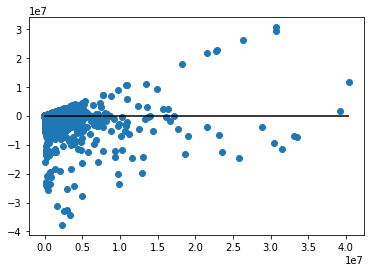

In [14]:
# Plot Residuals
predictions = model.predict(x)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()